In [25]:
import os
import pickle
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [14]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [15]:
print("Dataset shape:", df.shape)
print("Target distribution:", y.value_counts())

Dataset shape: (569, 30)
Target distribution: target
1    357
0    212
Name: count, dtype: int64


In [16]:
FEATURES = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry'
]
X = df[FEATURES]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [18]:

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_sc, y_train)

LogisticRegression(max_iter=10000)

In [20]:
y_pred = model.predict(X_test_sc)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy on Test Set: {acc:.4f}")

✅ Model Accuracy on Test Set: 0.8947


In [21]:
out_dir = os.path.join(os.getcwd(), "..", "saved_models")
os.makedirs(out_dir, exist_ok=True)

In [22]:
pickle.dump(model, open(os.path.join(out_dir, "breast_cancer_model.sav"), "wb"))
pickle.dump(scaler, open(os.path.join(out_dir, "breast_cancer_scaler.sav"), "wb"))
pickle.dump(FEATURES, open(os.path.join(out_dir, "breast_cancer_features.sav"), "wb"))


In [23]:
print("📂 Saved files to:", out_dir)

📂 Saved files to: c:\Users\91901\OneDrive\Desktop\HealthFusion\colab_files_to_train_models\..\saved_models


<Axes: xlabel='mean radius', ylabel='mean texture'>

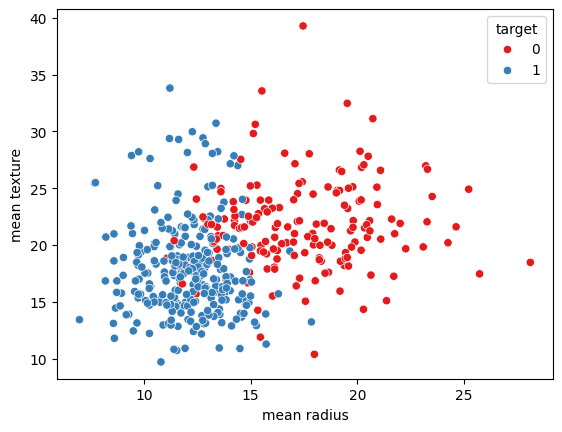

In [27]:
# Visualize the distribution of the first two features in the training set, colored by target
sns.scatterplot(
    x=X_train[FEATURES[0]],
    y=X_train[FEATURES[1]],
    hue=y_train,
    palette="Set1"
)